# CEIA - PEIA - Trabajo 1

## Ejercicio 3: 
### Análisis de Ventas del Supermercado de Don Francisco

- Autor: Emiliano Iparraguirre <emiliano.iparraguirre22@gmail.com>
- Proyecto: CEIA-PEIA-TP1
- Objetivo: a partir del archivo de datos correspondiente a su grupo, determinar una función empírica de distribución y una aproximación a la función de densidad de las ventas del supermercado de Don Francisco para cada año de registro (2021, 2022 y 2023)

## Resolucion del problema

In [1]:
# ---
# 1. Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración estética de los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
# ---
# 2. Carga de datos
df = pd.read_excel("../data/Datos_primer_TP_20Co2025_a2010.xlsx")
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year

In [4]:
# ---
# 3. Análisis exploratorio
print(df['Año'].value_counts().sort_index())
distribuciones = df.groupby('Año')['Ventas'].describe()
distribuciones

Año
2021    365
2022    365
2023    365
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Año,,,,,,,,
2021,365.0,18900.005934,3094.373962,7168.741634,17084.248727,19097.935226,20978.710352,26276.028803
2022,365.0,18865.478270,2945.878470,8509.727580,17056.061783,18957.476213,21010.993694,26344.330044
2023,365.0,18721.756635,2988.135082,8669.527746,16715.034286,18819.266546,20733.333005,27724.006757


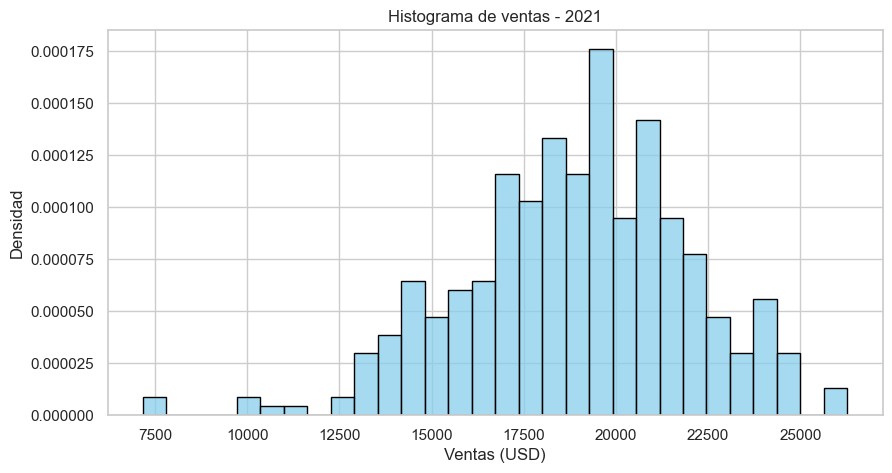

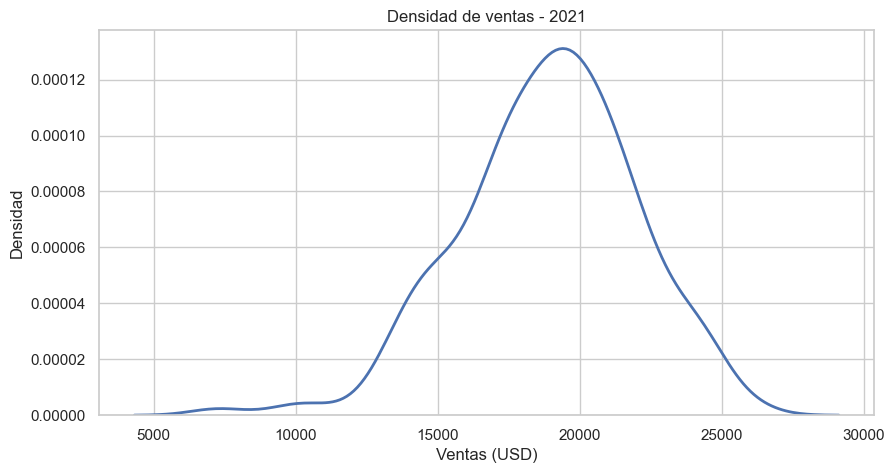

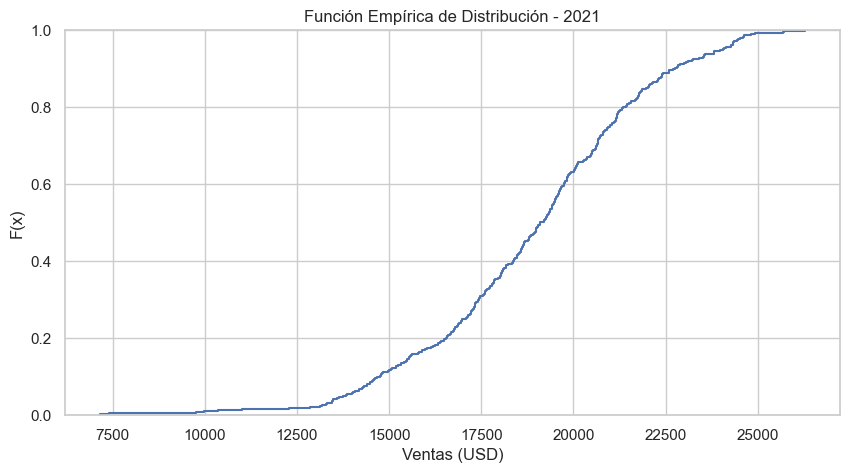

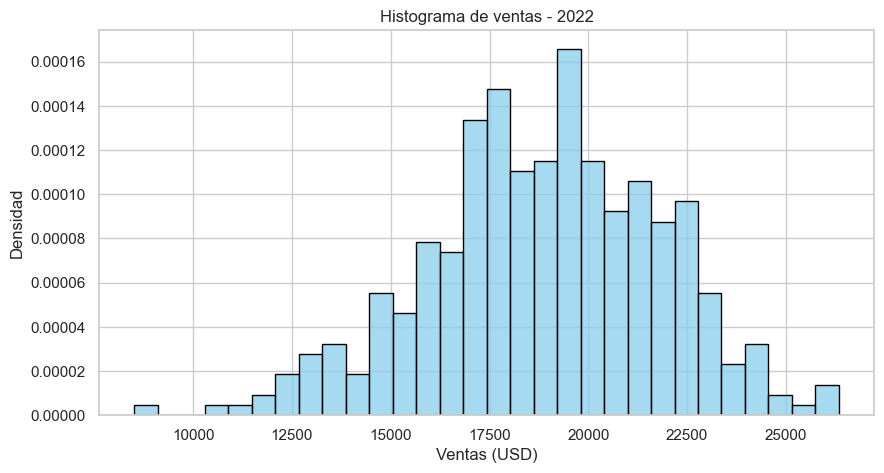

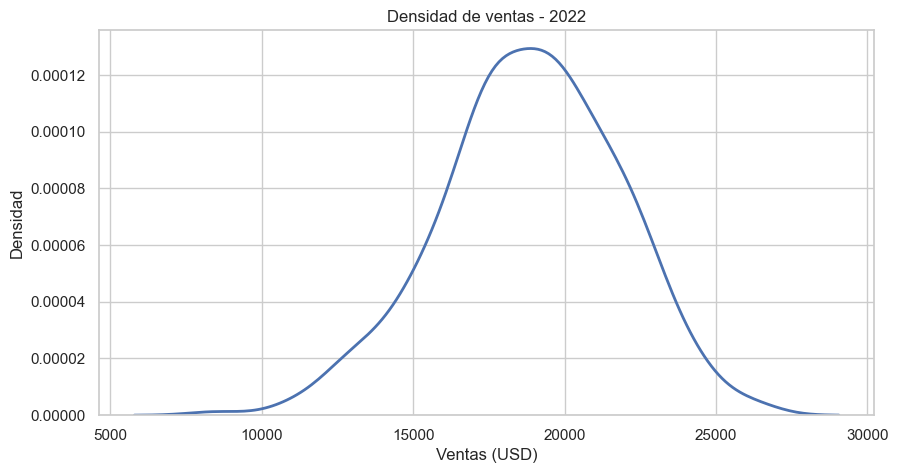

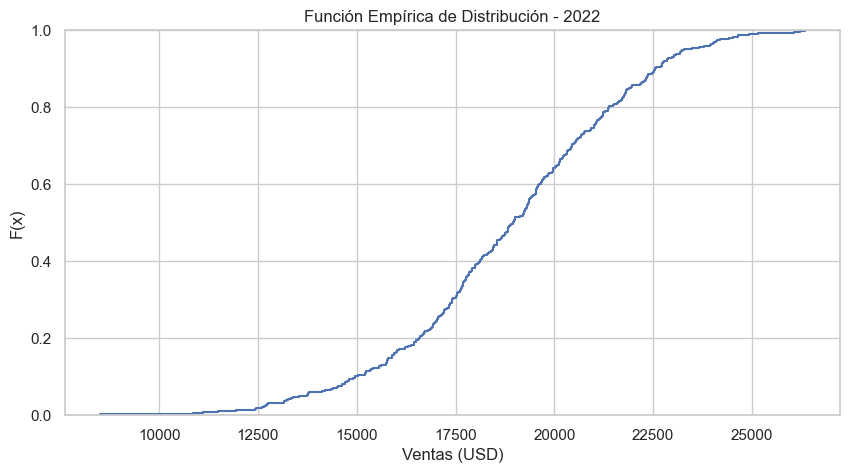

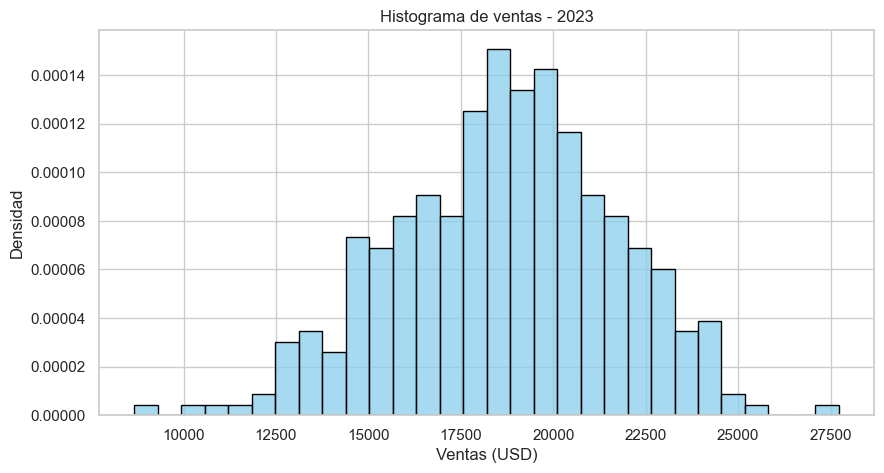

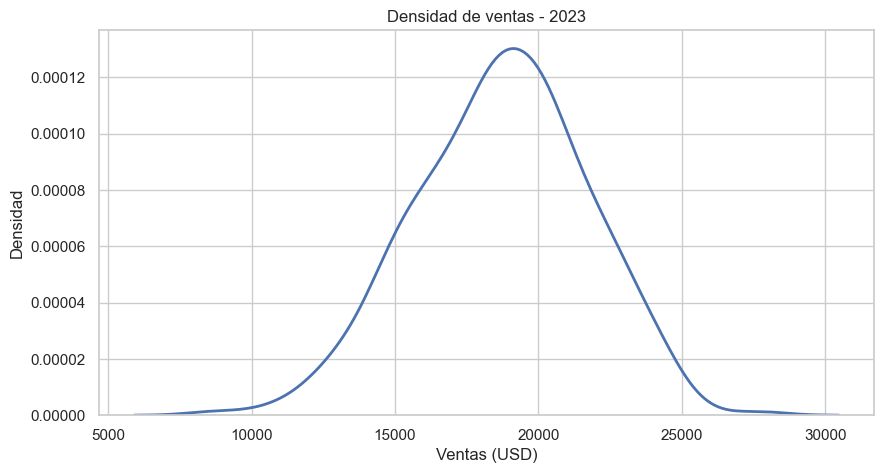

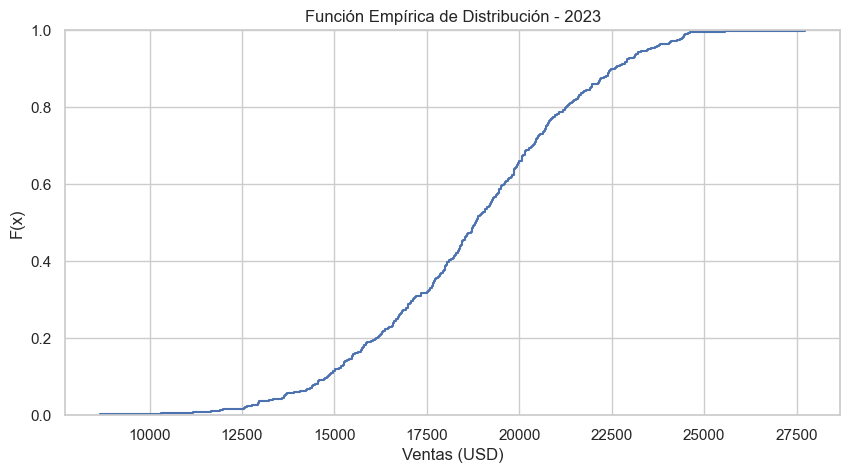

In [6]:
# ---
# 4. Visualización por año
for year in sorted(df['Año'].unique()):
    data = df[df['Año'] == year]['Ventas']

    # Histograma con densidad
    sns.histplot(data, stat='density', bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histograma de ventas - {year}")
    plt.xlabel("Ventas (USD)")
    plt.ylabel("Densidad")
    plt.show()

    # KDE
    sns.kdeplot(data, label=f"{year}", linewidth=2)
    plt.title(f"Densidad de ventas - {year}")
    plt.xlabel("Ventas (USD)")
    plt.ylabel("Densidad")
    plt.show()

    # ECDF
    sns.ecdfplot(data)
    plt.title(f"Función Empírica de Distribución - {year}")
    plt.xlabel("Ventas (USD)")
    plt.ylabel("F(x)")
    plt.show()

# ---
## 5. Conclusiones

### Análisis general

Las ventas diarias del supermercado presentan una distribución relativamente estable en los tres años analizados, con un patrón de comportamiento que sugiere una operación constante y predecible. Las medianas anuales se mantienen entre **18.800 y 19.000 USD**, con un rango de valores mínimos y máximos que no muestra saltos abruptos ni presencia de valores extremos significativos.

---

### Función empírica de distribución (ECDF)

- La ECDF permite visualizar cómo se acumula la frecuencia relativa de ventas a medida que aumenta el monto.
- En los tres años, la pendiente de la ECDF se muestra suave y continua, lo que indica una distribución amplia sin acumulaciones abruptas.
- Las curvas se superponen en gran parte, lo que refuerza la hipótesis de estabilidad interanual.
- Aproximadamente el **50% de los días** registraron ventas por debajo de los **19.000 USD**, lo que coincide con la mediana.
- Alrededor del **80% de las ventas** están concentradas entre **16.000 y 22.000 USD** según la forma de la ECDF.

---

### Función de densidad (KDE)

- La KDE suaviza la distribución observada y permite ver los modos (picos) en la frecuencia de ventas.
- Se observa una leve asimetría a la izquierda en algunos años, con una cola extendida hacia menores valores de ventas.
- Los máximos de densidad se ubican en torno a los **18.500–19.000 USD**, lo que refuerza el rol de ese rango como valor típico.
- La dispersión se mantiene moderada, lo que sugiere un comportamiento comercial estable sin grandes fluctuaciones.

---

### Consideraciones para el pronóstico de 2024

- La estabilidad en las distribuciones sugiere que es razonable asumir que el patrón de ventas puede mantenerse en el corto plazo.
- La función empírica puede ser útil para estimar probabilidades (por ejemplo: ¿cuál es la probabilidad de que un día se vendan menos de 17.000 USD?).
- La densidad estimada es útil para identificar rangos de mayor frecuencia esperada, ideal para establecer umbrales de control.
- La información está expresada en dólares, lo que facilita la proyección sin necesidad de ajustes por inflación.